# Perfil do eleitorado de Divinópolis, MG

Com base nos dados de 2018 do TSE:
<http://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais>

In [1]:
import pandas as pd
import csv
import utils as xu
import matplotlib.pyplot as pl

# Zonas eleitorais

Capturado em: <http://www.tse.jus.br/eleitor/cartorios-e-zonas-eleitorais/pesquisa-a-zonas-eleitorais>

In [2]:
zonas_raw = pd.read_csv('dados/lista_zonas_eleitorais_MG.csv', encoding='latin-1')

In [3]:
zonas_raw.loc[zonas_raw.nome_municipio == 'DIVINÓPOLIS']

,numero_zona,sigla_uf,endereco,cep,bairro,nome_municipio,sigla_uf.1
87,102,13-0102,"RUA PERNAMBUCO, 299",35500008,CENTRO,DIVINÓPOLIS,MG
88,103,13-0103,"RUA PERNAMBUCO, 299",35500008,CENTRO,DIVINÓPOLIS,MG


**Conclusões:** dados não são úteis para identificar as zonas, mas confirmam que só existem duas em Divinópolis.

# Perfil do eleitorado

### Carregando os dados e limpando

In [4]:
raw = pd.read_csv('dados/perfil_eleitorado_Divinopolis_MG.csv', encoding='utf-8', sep=';', dtype=str)

In [5]:
clean = raw
clean['QT_ELEITORES_PERFIL'] = clean['QT_ELEITORES_PERFIL'].astype(int)
clean['CD_FAIXA_ETARIA'] = clean['CD_FAIXA_ETARIA'].astype(int)

In [98]:
clean.QT_ELEITORES_PERFIL.sum()

163331

### Exploração em uma dimensão

In [99]:
clean.groupby('DS_GENERO')['QT_ELEITORES_PERFIL'].sum()

DS_GENERO
FEMININO     86652
MASCULINO    76679
Name: QT_ELEITORES_PERFIL, dtype: int64

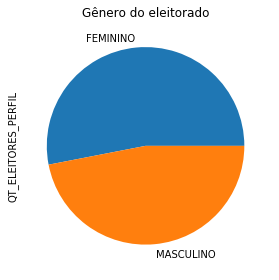

In [76]:
clean.groupby('DS_GENERO')['QT_ELEITORES_PERFIL'].sum().plot(kind='pie', title='Gênero do eleitorado')
pl.tight_layout()
pl.savefig('plots/genero_eleitorado.png')

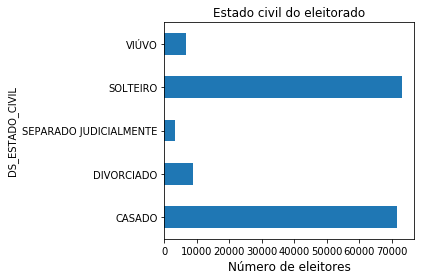

In [77]:
clean.groupby('DS_ESTADO_CIVIL')['QT_ELEITORES_PERFIL'].sum().plot(kind='barh', 
                                                                   title='Estado civil do eleitorado')
pl.xlabel('Número de eleitores', fontsize=12)
pl.tight_layout()
pl.savefig('plots/estado_civil_eleitorado.png')

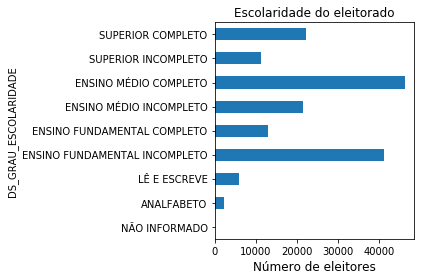

In [78]:
escola = clean.groupby('DS_GRAU_ESCOLARIDADE', sort=False)['QT_ELEITORES_PERFIL'].sum()

escolaridade_niveis = ['NÃO INFORMADO', 'ANALFABETO', 'LÊ E ESCREVE', 'ENSINO FUNDAMENTAL INCOMPLETO', 
        'ENSINO FUNDAMENTAL COMPLETO', 'ENSINO MÉDIO INCOMPLETO', 'ENSINO MÉDIO COMPLETO', 
        'SUPERIOR INCOMPLETO', 'SUPERIOR COMPLETO']

escola[escolaridade_niveis].plot(kind='barh', title='Escolaridade do eleitorado')
pl.xlabel('Número de eleitores', fontsize=12)

pl.tight_layout()
pl.savefig('plots/escolaridade_eleitorado.png')

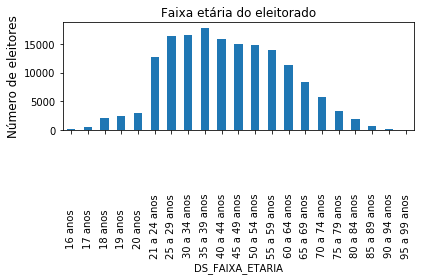

In [100]:
clean.groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum().iloc[1:-1].plot(kind='bar', title='Faixa etária do eleitorado')
pl.ylabel('Número de eleitores', fontsize=12)

pl.tight_layout()
pl.savefig('plots/faixa_etaria_eleitorado.png')

### Exploração em mais dimensões

In [57]:
pd.pivot_table(clean, index='DS_ESTADO_CIVIL', columns='DS_GENERO', values='QT_ELEITORES_PERFIL', 
              aggfunc='sum')

DS_GENERO,FEMININO,MASCULINO
DS_ESTADO_CIVIL,,
CASADO,37096,34372
DIVORCIADO,5383,3416
SEPARADO JUDICIALMENTE,1823,1420
SOLTEIRO,36838,36375
VIÚVO,5512,1096


### Apenas eleitoras (mulheres)

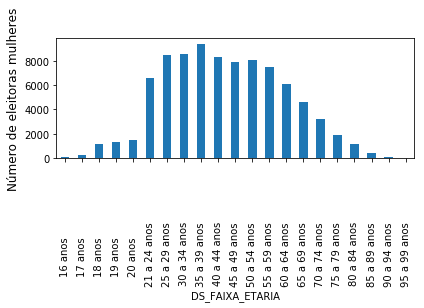

In [80]:
clean.loc[clean.DS_GENERO=='FEMININO'].groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum().iloc[1:-1].plot(kind='bar')
pl.ylabel('Número de eleitoras mulheres', fontsize=12)

pl.tight_layout()
pl.savefig('plots/faixa_etaria_eleitoras_mulheres.png')

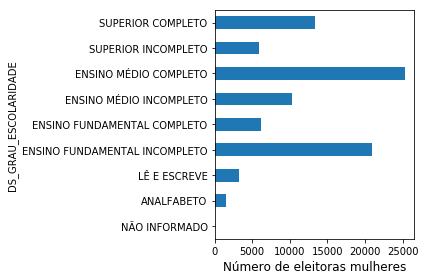

In [81]:
escola_mulheres = clean.loc[clean.DS_GENERO=='FEMININO'].groupby('DS_GRAU_ESCOLARIDADE')['QT_ELEITORES_PERFIL'].sum()

escola_mulheres[escolaridade_niveis].plot(kind='barh')

pl.xlabel('Número de eleitoras mulheres', fontsize=12)
pl.tight_layout()
pl.savefig('plots/escolaridade_eleitoras_mulheres.png')

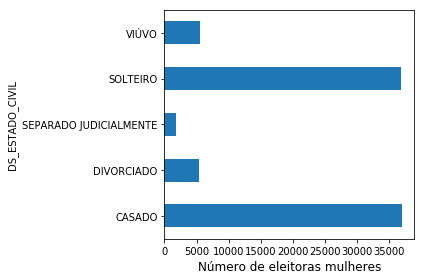

In [82]:
clean.loc[clean.DS_GENERO=='FEMININO'].groupby('DS_ESTADO_CIVIL')['QT_ELEITORES_PERFIL'].sum().plot(kind='barh')

pl.xlabel('Número de eleitoras mulheres', fontsize=12)

pl.tight_layout()
pl.savefig('plots/estado_civil_eleitoras_mulheres.png')

#### Estado civil das mulheres, por escolaridade

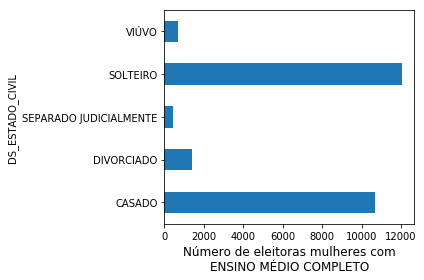

In [94]:
escola_slice = 'ENSINO MÉDIO COMPLETO'
clean.loc[(clean.DS_GENERO=='FEMININO') & 
          (clean.DS_GRAU_ESCOLARIDADE.isin([escola_slice]))].groupby('DS_ESTADO_CIVIL')['QT_ELEITORES_PERFIL'].sum().plot(kind='barh')

pl.xlabel('Número de eleitoras mulheres com\n' + escola_slice, fontsize=12)

pl.tight_layout()

pl.savefig('plots/estado_civil_mulheres_' + escola_slice.replace(' ', '_') + '.png')

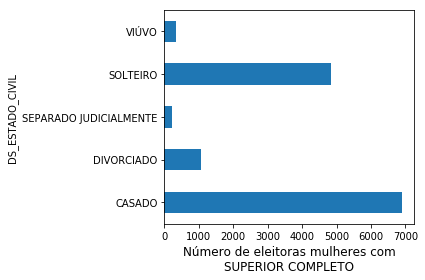

In [95]:
escola_slice = 'SUPERIOR COMPLETO'
clean.loc[(clean.DS_GENERO=='FEMININO') & 
          (clean.DS_GRAU_ESCOLARIDADE.isin([escola_slice]))].groupby('DS_ESTADO_CIVIL')['QT_ELEITORES_PERFIL'].sum().plot(kind='barh')

pl.xlabel('Número de eleitoras mulheres com\n' + escola_slice, fontsize=12)

pl.tight_layout()

pl.savefig('plots/estado_civil_mulheres_' + escola_slice.replace(' ', '_') + '.png')

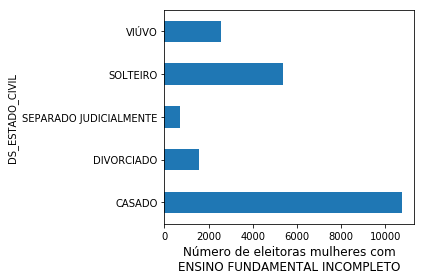

In [96]:
escola_slice = 'ENSINO FUNDAMENTAL INCOMPLETO'
clean.loc[(clean.DS_GENERO=='FEMININO') & 
          (clean.DS_GRAU_ESCOLARIDADE.isin([escola_slice]))].groupby('DS_ESTADO_CIVIL')['QT_ELEITORES_PERFIL'].sum().plot(kind='barh')

pl.xlabel('Número de eleitoras mulheres com\n' + escola_slice, fontsize=12)

pl.tight_layout()

pl.savefig('plots/estado_civil_mulheres_' + escola_slice.replace(' ', '_') + '.png')

#### Distribuição de idades de mulheres com diferentes escolaridades

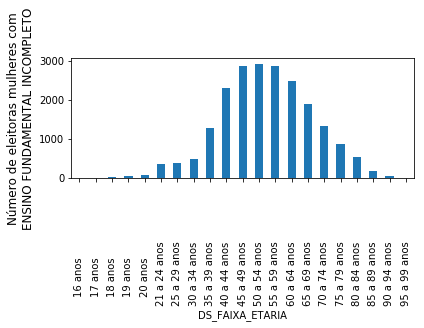

In [86]:
escola_slice = 'ENSINO FUNDAMENTAL INCOMPLETO'
clean.loc[(clean.DS_GENERO=='FEMININO') & 
          (clean.DS_GRAU_ESCOLARIDADE.isin([escola_slice]))].groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum().plot(kind='bar')

pl.ylabel('Número de eleitoras mulheres com\n' + escola_slice, fontsize=12)

pl.tight_layout()

pl.savefig('plots/faixa_etaria_mulheres_' + escola_slice.replace(' ', '_') + '.png')

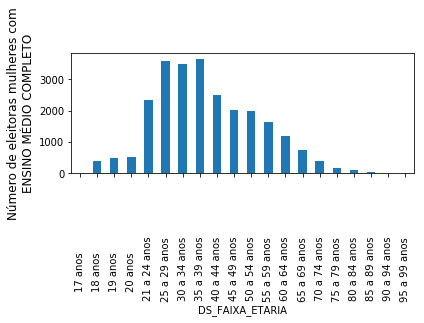

In [87]:
escola_slice = 'ENSINO MÉDIO COMPLETO'
clean.loc[(clean.DS_GENERO=='FEMININO') & 
          (clean.DS_GRAU_ESCOLARIDADE.isin([escola_slice]))].groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum().plot(kind='bar')

pl.ylabel('Número de eleitoras mulheres com\n' + escola_slice, fontsize=12)

pl.tight_layout()

pl.savefig('plots/faixa_etaria_mulheres_' + escola_slice.replace(' ', '_') + '.png')

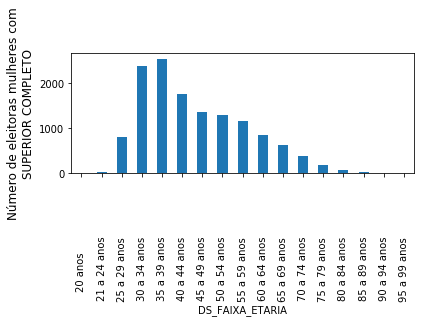

In [88]:
escola_slice = 'SUPERIOR COMPLETO'
clean.loc[(clean.DS_GENERO=='FEMININO') & 
          (clean.DS_GRAU_ESCOLARIDADE.isin([escola_slice]))].groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum().plot(kind='bar')

pl.ylabel('Número de eleitoras mulheres com\n' + escola_slice, fontsize=12)

pl.tight_layout()

pl.savefig('plots/faixa_etaria_mulheres_' + escola_slice.replace(' ', '_') + '.png')

### Seleção de público parecido com Laís

Mulheres de até 44 anos com, no mínimo, ensino médio completo

In [89]:
# Total de eleitores em Divinópolis:
clean.QT_ELEITORES_PERFIL.sum()

163331

In [90]:
q = "DS_GENERO == 'FEMININO' & \
(DS_GRAU_ESCOLARIDADE == 'ENSINO MÉDIO COMPLETO' | DS_GRAU_ESCOLARIDADE == 'SUPERIOR COMPLETO' | \
DS_GRAU_ESCOLARIDADE == 'SUPERIOR INCOMPLETO') & CD_FAIXA_ETARIA <= 4044"
target = clean.query(q)

In [91]:
# Total de eleitores no perfil escolhido:
target.QT_ELEITORES_PERFIL.sum()

29679

In [92]:
# Só existem duas zonas eleitorais em divinópolis:
clean.NR_ZONA.unique()

array(['102', '103'], dtype=object)

In [93]:
n_target_by_secao = target.groupby(['NR_ZONA', 'NR_SECAO'])['QT_ELEITORES_PERFIL'].sum().sort_values(ascending=False)

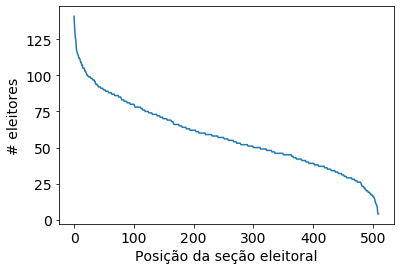

In [83]:
# Distribuição dos eleitores alvo por seção:
pl.plot(n_target_by_secao.values)
pl.xlabel('Posição da seção eleitoral', fontsize=14)
pl.ylabel('# eleitores', fontsize=14)
pl.tick_params(labelsize=14)
pl.show()

In [76]:
target.groupby('NR_ZONA')['QT_ELEITORES_PERFIL'].sum() / target['QT_ELEITORES_PERFIL'].sum() 

NR_ZONA
102    0.600728
103    0.399272
Name: QT_ELEITORES_PERFIL, dtype: float64

In [77]:
clean.groupby('NR_ZONA')['QT_ELEITORES_PERFIL'].sum() / clean['QT_ELEITORES_PERFIL'].sum() 

NR_ZONA
102    0.580147
103    0.419853
Name: QT_ELEITORES_PERFIL, dtype: float64

In [81]:
n_clean_by_secao = clean.groupby(['NR_ZONA', 'NR_SECAO'])['QT_ELEITORES_PERFIL'].sum().sort_values(ascending=False)

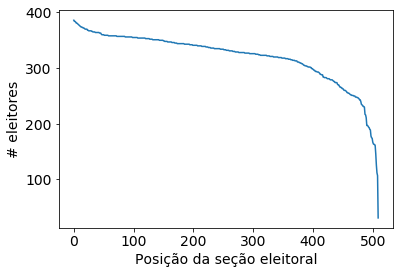

In [82]:
# Distribuição de todos os os eleitores por seção:
pl.plot(n_clean_by_secao.values)
pl.xlabel('Posição da seção eleitoral', fontsize=14)
pl.ylabel('# eleitores', fontsize=14)
pl.tick_params(labelsize=14)
pl.show()